# Final project

### The database is on life expectancy and health factors for 193 countries 
#### student names:
+ Anna Vardanyan
+ Nir Nagary
+ Magi Tagnya

![WhatsApp Image 2021-05-27 at 20 58 19](https://user-images.githubusercontent.com/83041734/119876283-65ab6980-bf30-11eb-8cbf-a24e0e0b0285.jpeg)

In [1]:
import pandas as pd
from itertools import cycle, islice
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#### wrangling data
##### 1.1 fix columns

In [6]:
url = 'https://raw.githubusercontent.com/NirNagary/AZgroup1/main/Life%20Expectancy%20Data.csv'
life_df = pd.read_csv(url)

# Fixing column names:
# Fixing column names:
life_df.columns = life_df.columns.str.replace(' ','_')
life_df = life_df.rename({'Life_expectancy_': 'Life_expectancy', 'Measles_': 'Measles','_BMI_': 'BMI', 'under-five_deaths_':'under-five_deaths','Diphtheria_': 'Diphtheria','_HIV/AIDS':'HIV/AIDS','_thinness__1-19_years':'thinness_10-19_years','_thinness_5-9_years':'thinness_5-9_years','percentage_expenditure': 'Health_expenditure'}, axis='columns')
life_df.info()
life_df[life_df['Country']=='Armenia']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Health_expenditure               2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,Health_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.000000,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
97,Armenia,2014,Developing,74.6,12.0,1,3.91,295.608714,93.0,13,...,95.0,4.48,93.0,0.1,3994.712355,29622.0,2.1,2.1,0.739,12.7
98,Armenia,2013,Developing,74.4,123.0,1,3.79,279.429081,95.0,10,...,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7
99,Armenia,2012,Developing,74.4,121.0,1,3.89,274.152699,95.0,0,...,96.0,4.48,95.0,0.1,3684.848100,2881922.0,2.0,2.1,0.732,12.7
100,Armenia,2011,Developing,73.9,128.0,1,4.09,260.996383,95.0,0,...,96.0,3.71,95.0,0.1,3526.978143,2875581.0,2.0,2.1,0.729,12.7
101,Armenia,2010,Developing,73.5,132.0,1,4.23,224.321201,94.0,2,...,96.0,4.56,94.0,0.1,3218.381655,2877311.0,2.0,2.1,0.720,12.3
102,Armenia,2009,Developing,73.3,137.0,1,3.96,201.185546,93.0,0,...,94.0,4.55,93.0,0.1,2993.832531,2888584.0,2.0,2.1,0.725,11.9
103,Armenia,2008,Developing,73.2,14.0,1,3.96,2.888898,89.0,0,...,91.0,3.80,89.0,0.1,41.269970,29822.0,2.0,2.1,0.721,12.3
104,Armenia,2007,Developing,73.5,132.0,1,3.99,44.572200,85.0,1,...,9.0,4.31,88.0,0.1,3138.887300,293356.0,2.0,2.1,0.707,11.7
105,Armenia,2006,Developing,72.9,141.0,1,4.01,244.535277,78.0,137,...,87.0,4.58,87.0,0.1,2158.299000,29585.0,2.0,2.1,0.692,11.2


##### 1.2 Missing values

In [7]:
# interplate cleanse by country, and dropna the leftovers (countries with full missing values)
life_df = life_df.groupby('Country').apply(lambda x : x.interpolate(method = "linear") )
life_df['Alcohol'].fillna(0, inplace = True) # the countrises with missing values in alcohol were countries that alcohol is prohibited
life_df = life_df.dropna()
life_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1987 non-null   object 
 1   Year                             1987 non-null   int64  
 2   Status                           1987 non-null   object 
 3   Life_expectancy                  1987 non-null   float64
 4   Adult_Mortality                  1987 non-null   float64
 5   infant_deaths                    1987 non-null   int64  
 6   Alcohol                          1987 non-null   float64
 7   Health_expenditure               1987 non-null   float64
 8   Hepatitis_B                      1987 non-null   float64
 9   Measles                          1987 non-null   int64  
 10  BMI                              1987 non-null   float64
 11  under-five_deaths                1987 non-null   int64  
 12  Polio               

##### 1.3 Outliers

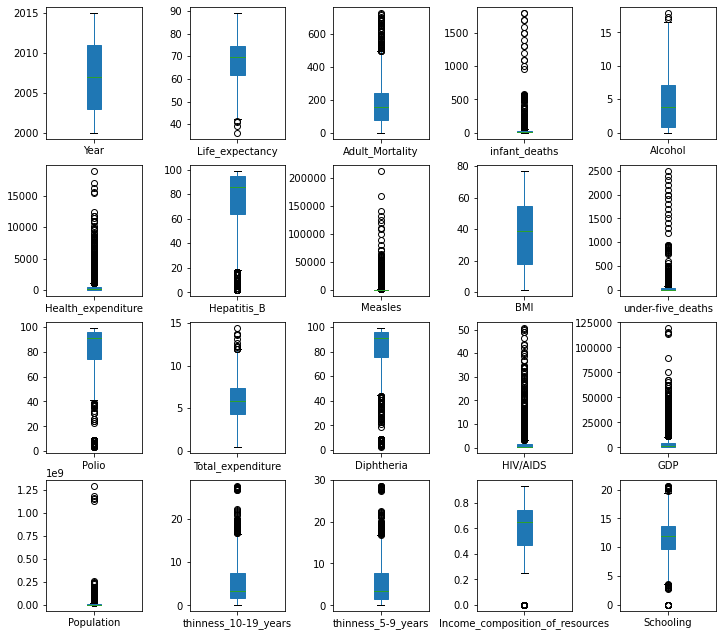

In [4]:
life_to_plot = life_df.drop(columns = ['Country','Status'])

life_df.plot(subplots=True, layout=(5,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

#### Understand the data


In [5]:
life_df['Developing'] = life_df['Status'].astype('category').cat.codes
life_df.head()


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,Health_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [6]:
life_df['thinness_under_19'] = life_df['thinness_5-9_years'] + life_df['thinness_10-19_years']
del life_df['thinness_5-9_years']
del life_df['thinness_10-19_years']

life_df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,Health_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources,Schooling,Developing,thinness_under_19
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1,1,34.5
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0,1,35.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9,1,35.4
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8,1,35.9
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5,1,36.4


except the year column, nothing is close to normal distribution, so we use  kendall


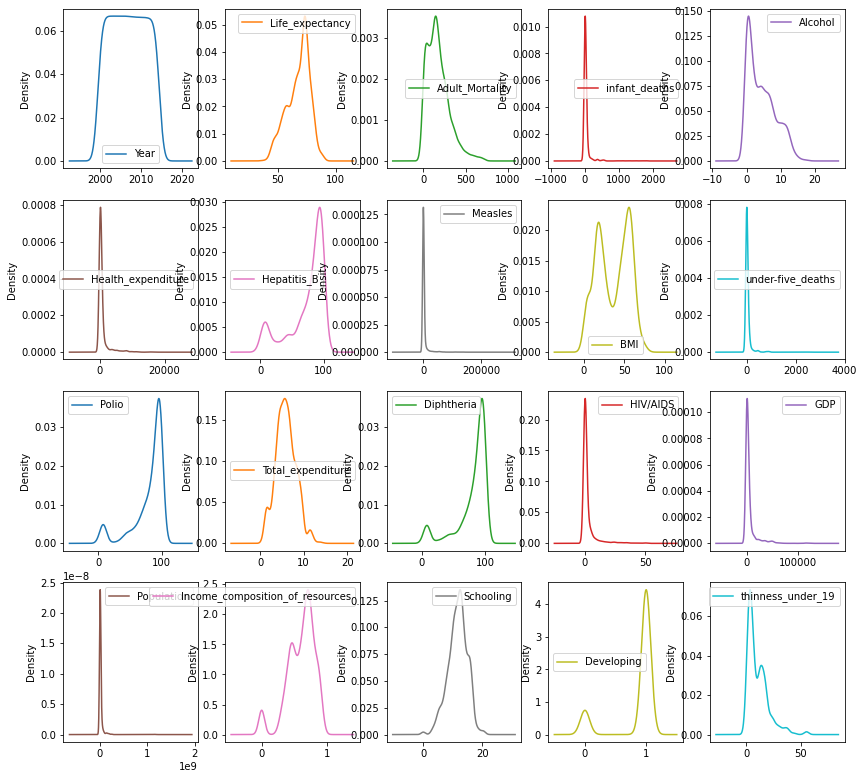

In [7]:
life_df.plot.density(subplots=True, sharex=False, sharey=False, layout=(5,5), figsize=(14,17))
print('except the year column, nothing is close to normal distribution, so we use  kendall')

#### Correlations

<AxesSubplot:>

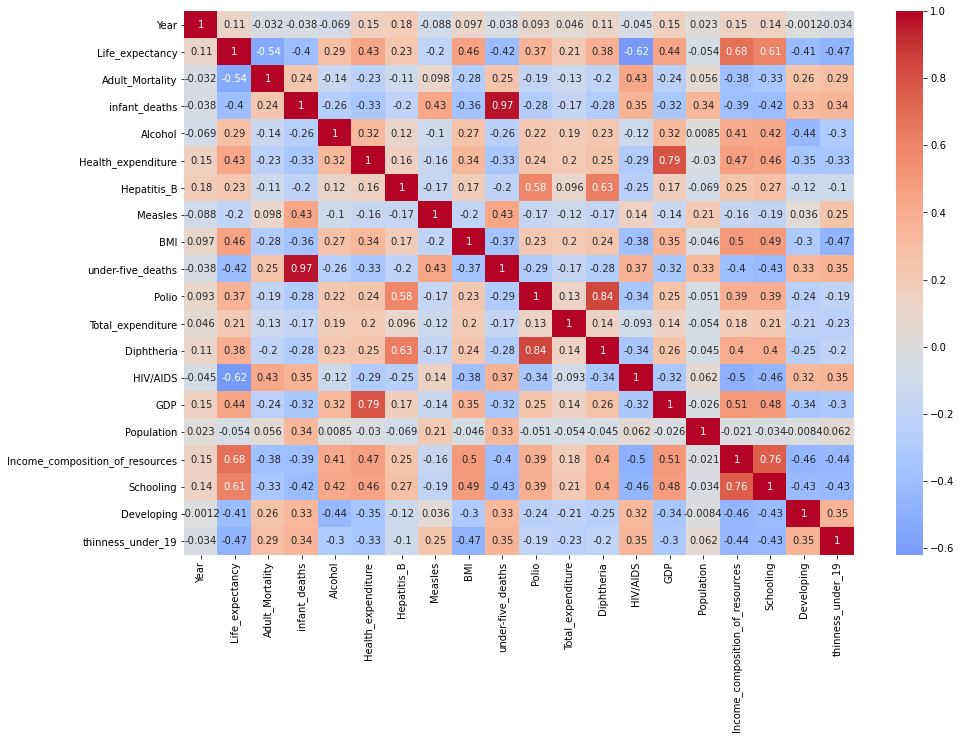

In [8]:
corrs = life_df.corr(method = 'kendall')
plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs,  cmap='coolwarm', center =0, annot = True)

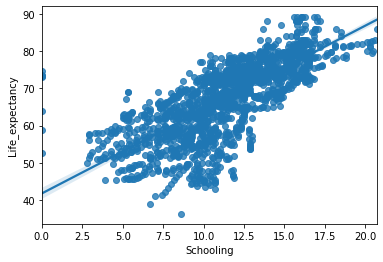

In [9]:
## 1
sns.regplot(x = 'Schooling', y = 'Life_expectancy', data = life_df ); 

---
>## Observation 1: 
>### School related to life expectancy? 
---

<function matplotlib.pyplot.show(close=None, block=None)>

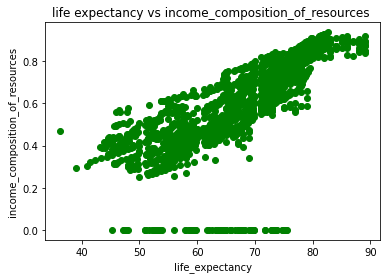

In [10]:

income_composition_of_resources=life_df['Income_composition_of_resources']
life_expectancy=life_df['Life_expectancy']

plt.plot(life_expectancy,income_composition_of_resources,'go')
plt.title('life expectancy vs income_composition_of_resources ')
plt.xlabel('life_expectancy')
plt.ylabel('income_composition_of_resources')
plt.show

<img width="1000" alt="income shool" src="https://user-images.githubusercontent.com/83041734/119875850-e9b12180-bf2f-11eb-8813-e72ca1b86a49.png">

---

>###  We may see clear correlation bebtween the two(schooling and life expectancy). however, this is not direct correlation. Schooling is very related to the ICOR, and we can see their corellation among other colums are almost the same!
---

In [11]:
###2
developed=life_df.pivot_table(['Life_expectancy','Alcohol','Schooling'],'Status')
developed


,Alcohol,Life_expectancy,Schooling
Status,,,
Developed,10.372737,78.831579,15.616491
Developing,3.464827,66.164982,10.973032


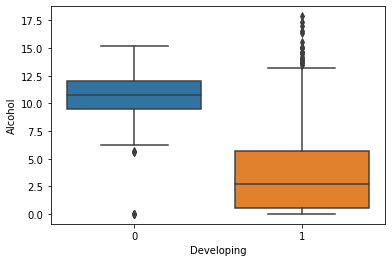

In [12]:
sns.boxplot(x = 'Developing',y = 'Alcohol',data=life_df);

--- 
>## Observation 2:
>### Surprisingly, we can see that developed countries consume way more alcohol than developing, even though the life expectancy is much higher!.
>##### but... what are these outliers?
---

In [13]:
outliers=life_df.sort_values(by='Alcohol',ascending=True)
outliers=outliers.loc[outliers['Status']=='Developed'].head(10)
outliers=outliers.loc[outliers['Alcohol']==0.01]
outliers


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,Health_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_composition_of_resources,Schooling,Developing,thinness_under_19
1830,Netherlands,2014,Developed,81.7,58.0,1,0.01,1491.703605,92.0,140,...,96.0,1.90,96.0,0.1,52157.46870,168658.0,0.923,18.1,0,1.9
2120,Romania,2014,Developed,74.8,135.0,2,0.01,1.576409,94.0,59,...,94.0,5.57,94.0,0.1,12.27733,1998979.0,0.797,14.7,0,5.4
2426,Spain,2014,Developed,82.6,58.0,1,0.01,42.988476,96.0,154,...,97.0,9.30,97.0,0.1,296.47225,4648882.0,0.877,17.6,0,1.1
1443,Latvia,2014,Developed,74.4,156.0,0,0.01,1542.635979,92.0,36,...,92.0,5.88,92.0,0.1,15725.13740,1993782.0,0.822,16.0,0,4.4
674,Cyprus,2014,Developed,83.0,53.0,0,0.01,207.304194,96.0,10,...,99.0,7.37,99.0,0.1,2734.88382,115239.0,0.850,14.0,0,1.9


---
>### These are the outliers in the develpoed countries.
>#### After googling we found a possible reason for Netherlands, and here is an article we found online.
>#### For the rest of the outliers we could not find any justified reason, so they are probably mistakes, after comparing to the other years. The right thing to do here, is to handle the outliers with linear interpolate
---

![WhatsApp Image 2021-05-27 at 21 33 07](https://user-images.githubusercontent.com/83041734/119879197-a3f65800-bf33-11eb-8de9-87b8cb5f9766.jpeg)


In [14]:
##3
## הוצאות על מערכת הבריאות לא משנות
pivot_health = life_df.pivot_table(['Life_expectancy','BMI','HIV/AIDS','thinness_under_19','Hepatitis_B','Measles','Diphtheria','Polio','infant_deaths'],'Country').sort_values('Life_expectancy')
pivot_health.tail(10)

,BMI,Diphtheria,HIV/AIDS,Hepatitis_B,Life_expectancy,Measles,Polio,infant_deaths,thinness_under_19
Country,,,,,,,,,
Germany,51.306667,89.533333,0.1,76.733333,81.186667,1432.733333,94.866667,2.533333,2.226667
Israel,54.326667,88.600000,0.1,97.533333,81.220000,142.866667,94.200000,1.000000,2.240000
Greece,58.160000,96.466667,0.1,88.466667,81.233333,26.466667,90.933333,0.200000,1.546667
Austria,47.666667,86.333333,0.1,80.266667,81.480000,61.800000,85.533333,0.000000,3.646667
Canada,55.120000,91.066667,0.1,24.133333,81.653333,125.133333,84.933333,2.000000,0.933333
Australia,55.146667,86.466667,0.1,93.466667,81.746667,105.933333,86.333333,1.000000,1.300000
Spain,58.140000,96.733333,0.1,92.200000,82.020000,472.200000,96.733333,1.666667,1.100000
Italy,55.653333,94.866667,0.1,95.666667,82.153333,2081.533333,96.333333,2.066667,1.026667
France,51.280000,98.066667,0.1,48.933333,82.206667,2828.600000,98.266667,3.000000,1.220000


<AxesSubplot:>

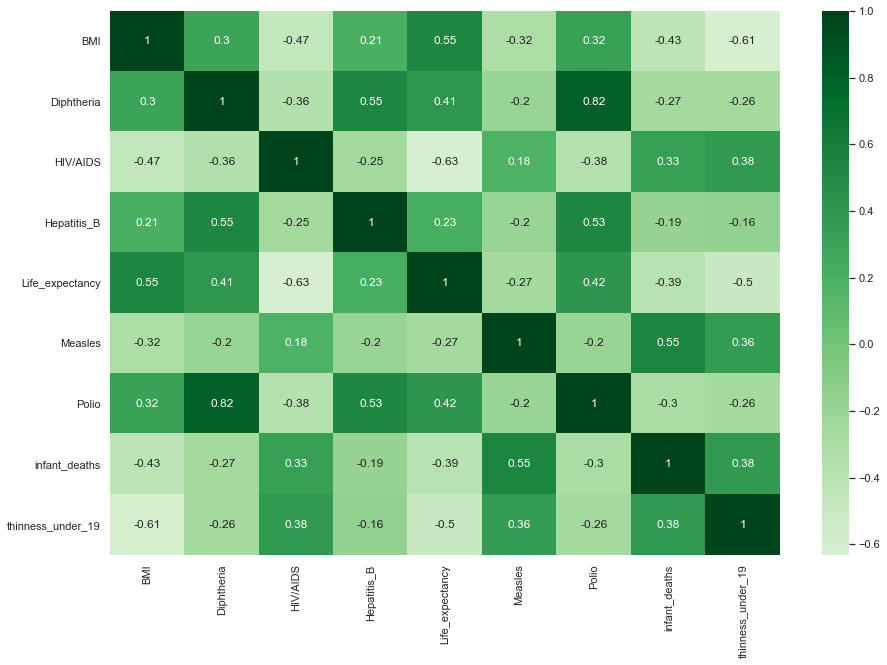

In [33]:
corrs1 = pivot_health.corr(method = 'kendall')
plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs1,  cmap='Greens', center =0, annot = True)
#Lets split our correlation table to health and economy.


In [34]:
pivot_economy = life_df.pivot_table(['Life_expectancy','Developing','Income_composition_of_resources','Health_expenditure','Total_expenditure', 'GDP'],'Country').sort_values('Life_expectancy',ascending = False)
pivot_economy.head(10)

,Developing,GDP,Health_expenditure,Income_composition_of_resources,Life_expectancy,Total_expenditure
Country,,,,,,
Sweden,0,30918.306117,4734.040697,0.892067,82.526667,9.932667
France,1,25794.803399,4001.607012,0.869000,82.206667,6.556000
Italy,0,22627.158025,3132.946831,0.856533,82.153333,8.777333
Spain,0,16520.767343,2488.192196,0.848467,82.020000,8.536667
Australia,0,33176.443543,5687.708238,0.916867,81.746667,8.836667
Canada,1,28454.051758,5007.017570,0.890400,81.653333,7.052000
Austria,0,33171.578263,5257.001801,0.860400,81.480000,4.715333
Greece,1,17538.665601,1876.529942,0.840800,81.233333,9.038667
Israel,1,17735.882915,1565.371549,0.871533,81.220000,7.478667


<AxesSubplot:>

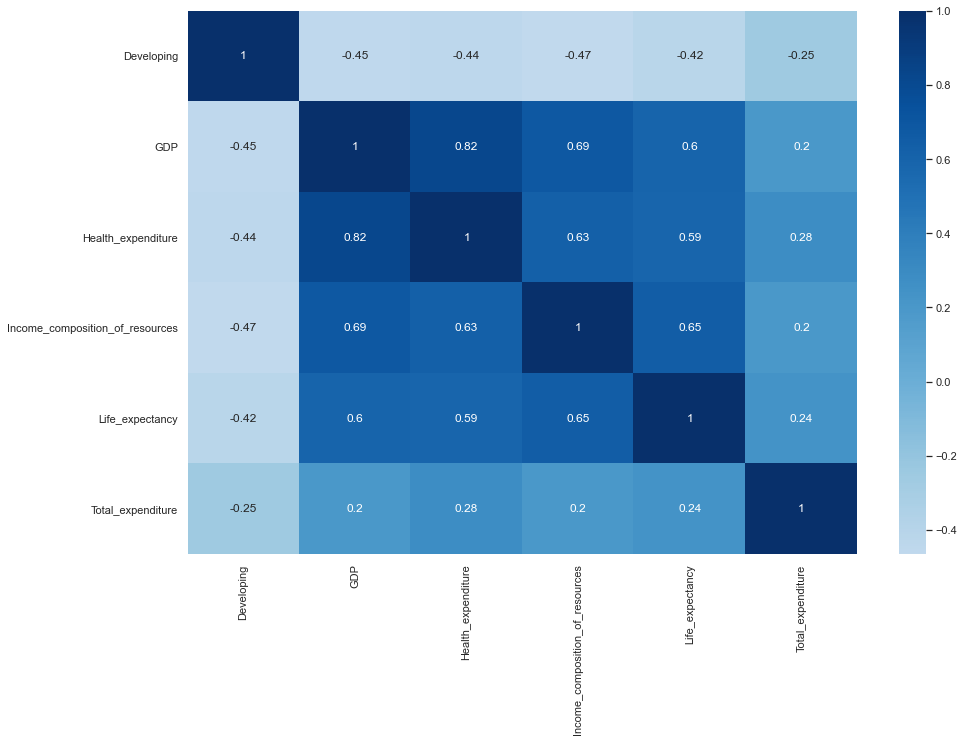

In [35]:
corrs2 = pivot_economy.corr(method = 'kendall')
plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs2,  cmap='Blues', center =0, annot = True)


<img width="1000" alt="2021-05-17 (1)" src="https://user-images.githubusercontent.com/83041734/119875876-f170c600-bf2f-11eb-89fb-56b415f29db6.png">


---
>#### Now we can see ICOR(income composition of reasources) and Life expectancy has the same correlations among other columns, this way we can understand that everything starts with the ICOR.
>#### The less correlated columns are due to specific high correlation to life expectancy (adult mortalty and ect)

<function matplotlib.pyplot.show(close=None, block=None)>

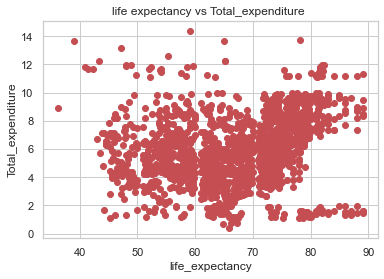

In [36]:
Total_expenditure=life_df['Total_expenditure']
life_expectancy=life_df['Life_expectancy']

plt.plot(life_expectancy,Total_expenditure,'ro')
plt.title('life expectancy vs Total_expenditure ')
plt.xlabel('life_expectancy')
plt.ylabel('Total_expenditure')
plt.show

--- 
>## Observation 3:
>### The Total Expenditure(goverment expenditure on health, in % of the total epxenditure) is by far less related to the life expectancy or ICOR, compared to the other economic critrions
----

In [37]:
a = life_df.pivot_table(['Life_expectancy'],'Country').sort_values('Life_expectancy', ascending = False)
top10 = a.head(10)
worst10=a.tail(10)
print('Top 10 countries with the worst life expectancy:')
display(worst10)
print('')
print('')
print('top 10 countries with the best life expectancy:')

display(top10)



Top 10 countries with the worst life expectancy:


,Life_expectancy
Country,
Mozambique,53.113333
Nigeria,51.146667
Swaziland,50.820000
Chad,50.206667
Zimbabwe,49.386667
Malawi,49.333333
Angola,48.793333
Lesotho,48.453333
Central African Republic,48.246667




top 10 countries with the best life expectancy:


,Life_expectancy
Country,
Sweden,82.526667
France,82.206667
Italy,82.153333
Spain,82.020000
Australia,81.746667
Canada,81.653333
Austria,81.480000
Greece,81.233333
Israel,81.220000


## As we can see Israel is in the top 10 !
![5aul5m](https://user-images.githubusercontent.com/83041734/119876154-3eed3300-bf30-11eb-81d9-fa1ec192483c.gif)

Text(0.5, 1.0, 'Total_expenditure of Israel ,Swaziland and Afghanistan')

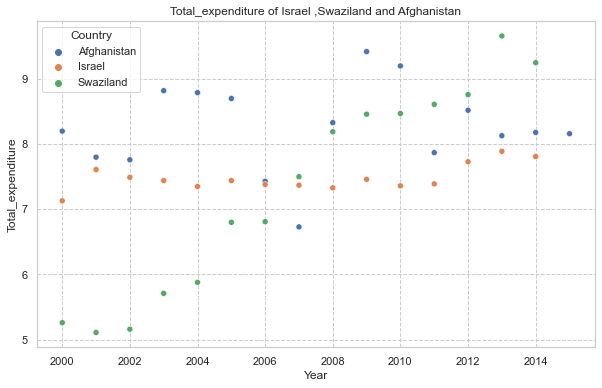

In [39]:
new_one = life_df.drop(life_df.loc[(life_df.Country != 'Israel')&(life_df.Country != 'Afghanistan')&(life_df.Country != 'Swaziland')].index)
new_one = new_one[['Life_expectancy','Country', 'Year', 'Total_expenditure']]

#גרף
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "Year", y = 'Total_expenditure', data = new_one,  hue = "Country")
plt.xlabel("Year")
plt.ylabel("Total_expenditure")
plt.title("Total_expenditure of Israel ,Swaziland and Afghanistan")

---
>#### In addition, the total expenditure is not higher in developed\welthier countries(Israel), compared to poor\develping counries(Swaziland).
---